In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

%matplotlib inline

In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [4]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
# print the intercept
print(lm.intercept_)

-2640159.7968526958


In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [12]:
predictions = lm.predict(X_test)

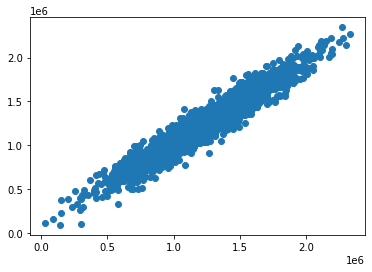

In [13]:
plt.scatter(y_test,predictions)

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914944
MSE: 10460958907.208984
RMSE: 102278.829222909


In [17]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [19]:
#Taking the input from the user
print("Enter the Price details:")
Area_Income = float(input("Area_Income: "))
House_Age = float(input("House_Age: "))
No_Rooms = float(input("No_Rooms : "))
No_BedRooms = float(input("No_BedRooms: "))
Area_Population = float(input("Area_Population: "))
#newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = lm.predict([[Area_Income,House_Age,No_Rooms,No_BedRooms,Area_Population]])
#print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      #.format(output[0][0] if output else "not predictable",tv,radio,newspaper))
print(output)

Enter the Price details:
Area_Income: 212
House_Age: 212
No_Rooms : 212
No_BedRooms: 212
Area_Population: 212
[58738597.61326379]


In [22]:
filename1 = 'House_price_predict_model'
pickle.dump(lm, open(filename1,'wb'))

In [23]:
loaded_model = pickle.load(open(filename1,'rb'))

In [24]:
loaded_model.predict([[12,12,12,12,12]])

array([834109.49051239])

In [29]:
res = 45.5
res = int(res)

In [33]:
print('Hi {:.0f}'.format(res))

Hi 45


In [30]:
res

45

In [35]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [37]:
USAhousing['Avg. Area Number of Rooms'].max()

10.759588335938624

In [38]:
USAhousing['Avg. Area Number of Bedrooms'].max()

6.5

In [39]:
USAhousing['Avg. Area House Age'].max()

9.51908806613594